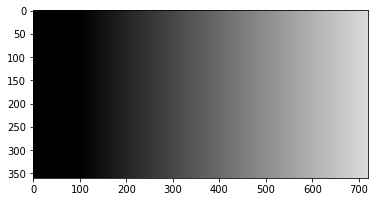

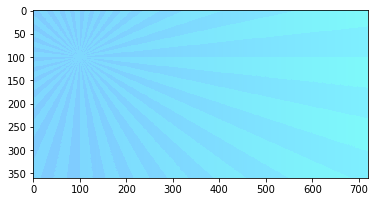

True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
bg = np.ones((360, 720, 3)) * np.array([0.5, 0.8, 1.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# generate strips.
times = 30
rad = 360 / times / 2 
x, y = 100, 100
for i in range(times):
    rotate = i * rad * 2
    img = cv2.ellipse(bg,(x,y),(1500,1500),rotate,0,rad,(0.5,0.85,1.0),-1)
img *= 255
img = img.astype(np.uint8)
# plt.imshow(img[..., ::-1])
# plt.show()

# second color.
color_converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# shift color.
color_converted[:, :, 0] += 10
img_1 = cv2.cvtColor(color_converted, cv2.COLOR_HSV2BGR)
# plt.imshow(img_1[...,::-1])
# plt.show()


# make opacity mask.
alpha = np.ones((360, 720, 3))

# H, W = 170, 170
# x, y = 180, 360
# sigma = -1
# gaussian_kernel = cv2.getGaussianKernel(H, 50) * cv2.getGaussianKernel(W, 50).T
# gaussian_kernel /= np.max(gaussian_kernel)
# x0, x1, y0, y1 = int(x-W/2), int(x+W/2), int(y-H/2), int(y + H/2)
# alpha[x0:x1, y0:y1, :] *= 1-  gaussian_kernel[:,:,np.newaxis]

revert = 0
shift = 100
mag = 1.0
for i in range(720):
    alpha[:,i,:] *= np.abs(revert -  max(min(mag * (i - shift)  / 720, 1.), 0.0))
plt.imshow(alpha[..., ::-1])
plt.show()
    
# optional. reverse mask.
# combine.
mask_img = (alpha * img_1 + (1 - alpha)*img).astype(np.uint8)
plt.imshow(mask_img)
plt.show()

cv2.imwrite('test.jpg', mask_img)

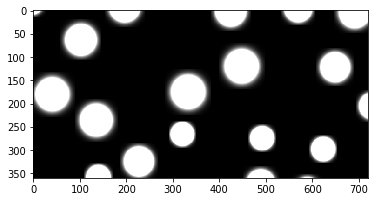

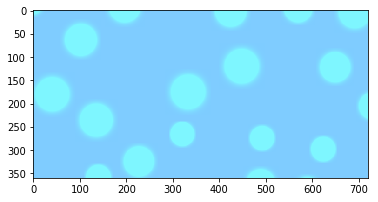

In [169]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
random.seed(10)
# INIT CANVAS = 360(H), 720(W)
H = 360
W = 720
RGB = (np.array([0.5, 0.8, 1.0])*255).astype(np.uint8)
alpha = np.zeros((360, 720))
img = (np.ones((360, 720, 3)) * np.array([0.5, 0.8, 1.0])*255).astype(np.uint8)
color_converted = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# shift color.
color_converted[:, :, 0] += 10
img_1 = cv2.cvtColor(color_converted, cv2.COLOR_HSV2BGR)

def gen_gaussian_kernel(side, r=100, sigma=-1):
    gaussian_kernel = cv2.getGaussianKernel(side, sigma) * cv2.getGaussianKernel(side, sigma).T
    gaussian_kernel = gaussian_kernel * 255 * r
    gaussian_kernel[gaussian_kernel > 1] = 1
    return gaussian_kernel

def gen_random_point(H, W):
    side = random.randint(50, 100)
    x, y = random.randint(side, H - side), random.randint(side, W - side)
    sigma = 0
    r = random.randint(10, 500)
    gaussian_kernel = gen_gaussian_kernel(side, 100, sigma)
    x0, x1, y0, y1 = int(x-side/2) , int(x+side/2), int(y - side/2), int(y + side/2)
#     print( x0, x1, y0, y1)
    return gaussian_kernel, slice(x0,x1), slice(y0,y1)
side = 100
alpha = np.zeros((H + 2 * side, W + 2 * side))

num_kernel = 0
while num_kernel < 20:
    gaussian_kernel, sx, sy = gen_random_point(H + 2*side, W + 2*side)
    if np.all(alpha[sx, sy] == 0):
        alpha[sx, sy] = np.maximum(gaussian_kernel, alpha[sx,sy])
        num_kernel += 1

alpha = alpha[side: side+H,side: side+W][...,np.newaxis]
plt.imshow(np.repeat(alpha, 3, 2))
plt.show()
mask_img = (alpha * img_1 + (1 - alpha)*img).astype(np.uint8)
plt.imshow(mask_img)
plt.show()

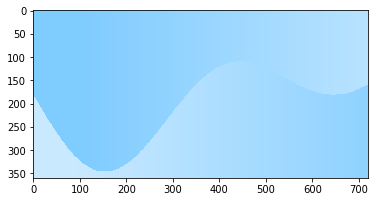

In [14]:
from BGGenTony import BGGenTony
DEBUG = True
H = 360
W = 720
RGB = (np.array([0.5, 0.8, 1.0])*255).astype(np.uint8)
tonyer = BGGenTony(H, W)
bg = tonyer.sea_bg(RGB)
plt.imshow(bg)
plt.show()

In [184]:
def strip_mask(alpha, H, W):
    for i in range(4):
        thickness = 30
        ptStart = (30 + i * thickness * 2, 60)
        ptEnd = (60 + i * thickness * 2, 260)
        point_color = (0.2) # BGR
        lineType = 8
        cv2.line(alpha, ptStart, ptEnd, point_color, thickness, lineType)
    plt.imshow(alpha)
    plt.show()
    cv2.imwrite('strip.jpg', alpha * 255)
    return alpha
def triangle_mask(alpha, H, W):
    for i in range(4):
        thickness = 30
        ptStart = (30 + i * thickness * 2, 60)
        ptEnd = (60 + i * thickness * 2, 260)
        point_color = (0.6) # BGR
        lineType = 8
        cv2.triangulatePoints(alpha, ptStart, ptEnd, point_color, thickness, lineType)
    plt.imshow(alpha)
    plt.show()
    cv2.imwrite('strip.jpg', alpha * 255)
    return alpha

In [142]:
H, W = 360, 720
alpha = np.ones((H, W))
alpha = triangle_mask(alpha, H, W)

TypeError: triangulatePoints() takes at most 5 arguments (6 given)